In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0,'/home/bradhakrishnan/ECE276A_PR1/code/')

In [4]:
import motion_calibration
import load_data
import jax
import jax.numpy as jnp
import quaternion_ops as qops 

dataset_idx= 1
jax.config.update("jax_enable_x64", True)

In [5]:
calibrated_imu, vicd_data, camera_data= motion_calibration.calibrate_v2(dataset_idx,400)

Dataset 1 :: 

Data import took: 2.1720266342163086 sec.

Dataset 1 :: 

Data import took: 2.145097017288208 sec.

[-510.82793017 -500.9925187   605.16209476  373.56857855  375.34164589
  369.67082294]


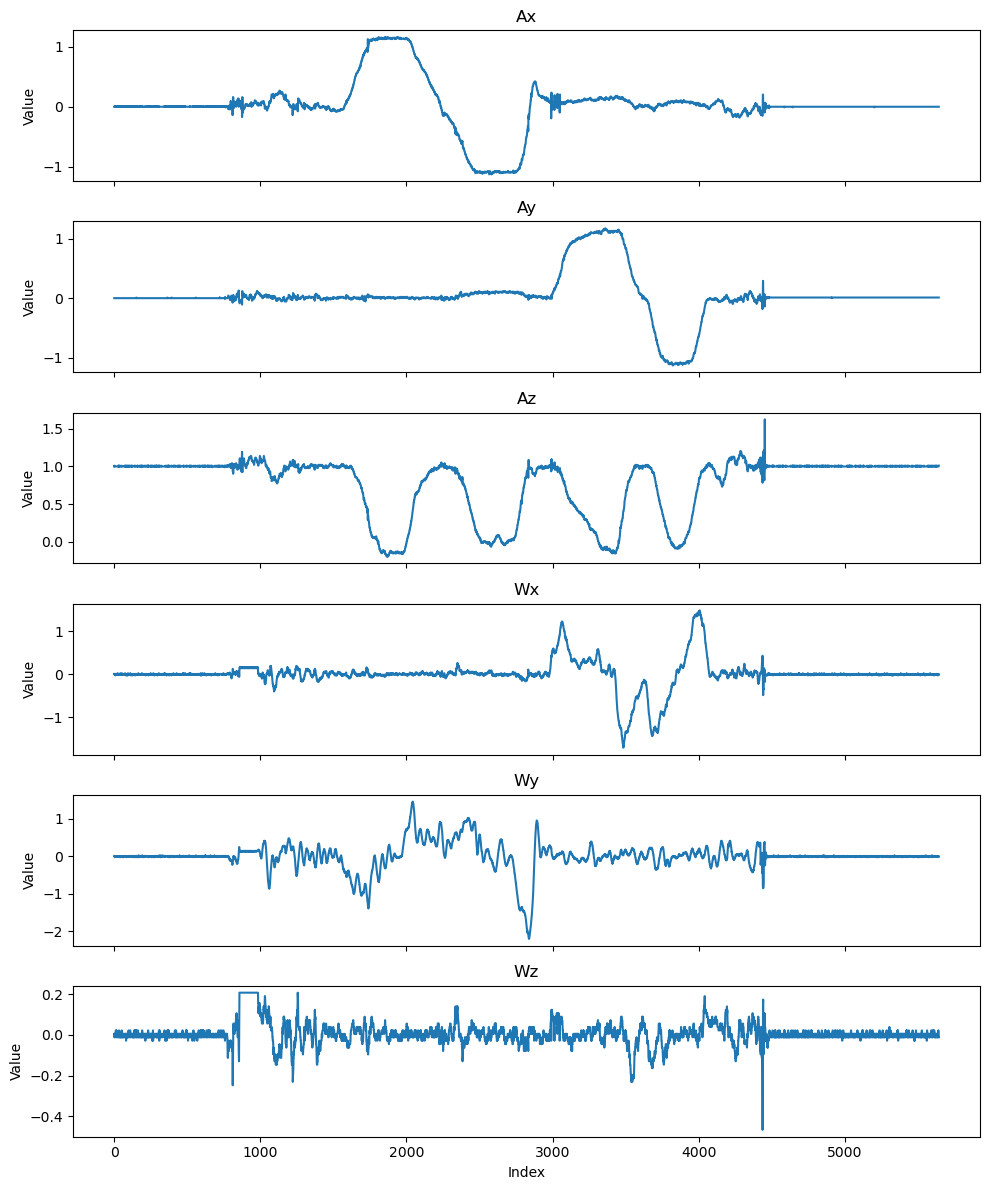

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your actual 7x1000 NumPy array)
data = calibrated_imu  # Example random data

# Create subplots for the remaining 6 rows
fig, axes = plt.subplots(6, 1, figsize=(10, 12), sharex=True)
titles= ["Ax", "Ay", "Az", "Wx", "Wy", "Wz"]
for i in range(1, data.shape[0]):  # Start from index 1 to skip the first row
    axes[i - 1].plot(data[i])
    axes[i - 1].set_title(f'{titles[i-1]}')  # Adjusting title to match original indexing
    axes[i - 1].set_ylabel('Value')

axes[-1].set_xlabel('Index')  # Set x-label only for the last subplot

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [10]:
import numpy as np

# Assuming calibrated_imu is already defined and has at least 7 rows
selected_rows = calibrated_imu[4:7, :]  # Extract rows 4, 5, and 6

# Find indices where all three values are the same and nonzero
valid_indices = np.where((selected_rows[0, :] == selected_rows[1, :]) & 
                         (selected_rows[1, :] == selected_rows[2, :]) & 
                         (selected_rows[0, :] != 0))[0]

# Identify contiguous segments
if len(valid_indices) > 0:
    contiguous_segments = np.split(valid_indices, np.where(np.diff(valid_indices) > 1)[0] + 1)

    # Set values to zero for segments that have at least 100 indices
    for segment in contiguous_segments:
        if len(segment) >= 10:
            calibrated_imu[4:7, segment] = 0
else:
    print("No valid contiguous indices found.")

print("Updated calibrated_imu with contiguous segments set to zero.")


No valid contiguous indices found.
Updated calibrated_imu with contiguous segments set to zero.


In [11]:
contiguous_segments

NameError: name 'contiguous_segments' is not defined

In [12]:
valid_indices

array([], dtype=int64)

In [31]:
from runner import run
run(1)

(3156,)